In [1]:
from helper_NtupleReader import *
from helper_Plotter import *
from tqdm import trange
%matplotlib inline

Welcome to JupyROOT 6.16/00


# 1. read ntuple

In [2]:
for pid in ['11','13','22','211']:
    inputFileName = '../data/root/step4_NTUPLE_pid{}.root'.format(pid)
    outputFileName = '../data/pickle/dataset_layerPool_pid{}.pkl'.format(pid)
    rd = NtupleReader(inputFileName,n=-1, tqdmLabel='Making Dataset PID={} '.format(pid), layerPool=True )
    rd.makeDataset(outputFileName)

Making Dataset PID=211 : 100%|██████████████████████████| 10000/10000 [00:33<00:00, 296.41 events/s]


# 2. visualize training data

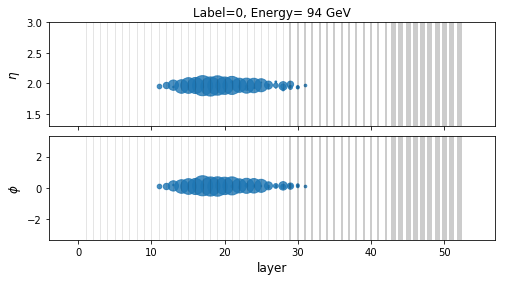

In [2]:
events = pd.read_pickle('../data/pickle/dataset_pid11.pkl')
plotEvent_EtaPhi(events,3)

In [3]:
for pid in ['11','13','22','211']:
    events = pd.read_pickle('../data/pickle/dataset_pid{}.pkl'.format(pid))
    for i in range(100):
        plotEvent_EtaPhi(events,i)
        plt.savefig('../plots/display/pid{}/event_{}.png'.format(pid,i),dpi=200)
        plt.close()

In [2]:
import glob
import os, sys
pickles = glob.glob('../data/pickle/dataset_layerPool_pid*.pkl')
dataFrame = pd.concat([ pd.read_pickle(pickle) for pickle in pickles],ignore_index=True)
dataFrame = dataFrame.sample(frac=1).reset_index(drop=True)

In [3]:
train_layerPool = dataFrame[0:30000]
test_layerPool = dataFrame[30000:]

In [4]:
train_layerPool.to_pickle("../data/pickle/train_layerPool.pkl")
test_layerPool.to_pickle("../data/pickle/test_layerPool.pkl")